# Exercise 5: Kinematics of the Gaseous disk around HD58647


Spectro-interferometry in atomic lines allows to constrain dynamics thanks to the [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect). 

This technique has been used to probe the kinematics of many objects : 
- rotation of stellar photospheres (e.g. [Domiciano de Souza 2012](https://ui.adsabs.harvard.edu/abs/2012A%26A...545A.130D/abstract))
- convection of stellar photospheres  (e.g. [[Ohnaka et al. 2009](https://ui.adsabs.harvard.edu/abs/2009A%26A...503..183O/abstract))
- rotating disk around classical Be stars (e.g. [Meilland et al. 2012](https://ui.adsabs.harvard.edu/abs/2012A%26A...538A.110M/abstract))
- gaseous emission of YSO (e.g. [Weigelt et al. 2012](https://ui.adsabs.harvard.edu/abs/2011A%26A...527A.103W/abstract))
- radiative wind of supergiants (e.g. [Chesneau et al. 2014](https://ui.adsabs.harvard.edu/abs/2014A%26A...566A.125C/abstract))
- Wind collision (e.g. [Weigelt et al.2021 ](https://ui.adsabs.harvard.edu/abs/2021A%26A...652A.140W/abstract))
- novae (e.g. [Chesneau et al. 2011](https://ui.adsabs.harvard.edu/abs/2011A%26A...534L..11C/abstract))
- interacting binaries (e.g. [Mourard et al. 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...618A.112M/abstract))
- AGNs (e.g. [GRAVITY Collaboration et al. 2021](https://ui.adsabs.harvard.edu/abs/2021A%26A...648A.117G/abstract))

#### **Question : give the equation of the Doppler shift?**

#### **Question : What spectral resolution is needed to study circumstellar disk (typical velocity of 200km/s) and stellar convection (10km/s)?**

#### **Can you study these phenomena with GRAVITY? (R=4000)**

In this section we will focus on rotating disk around stars. Such disk are found around YSO, some evolved stars (such as the Be star l Pup ([Millour et al. 2011](https://www.aanda.org/articles/aa/pdf/2011/02/aa16193-10.pdf)) and of course classical Be stars (e.g. [Meilland et al. 2012](https://ui.adsabs.harvard.edu/link_gateway/2012A%26A...538A.110M/PUB_PDF)).

The idea of this section is not to provide a comprehensive guide of how to model spectro-interferometric measurements of rotating disks but to introduce the subject and show how to use the **oimKinematicDisk** component implemented in **oimodeler**.

### The Kinematic disk component
The **oimKinematicDisk** component is based on the work presented in [Meilland et al. 2012](https://ui.adsabs.harvard.edu/link_gateway/2012A%26A...538A.110M/PUB_PDF) to model classical Be stars. 

The model consists in three components:
- a **uniform disk** representing the **star**
- a **flattened Gaussian** distribution for the **circumstellar disk emission in the continuum**
- a second **flattened Gaussian** distribution for the **circumstellar disk emission in the emission line**
  
The emission in the line is affected by a **velocity field through the Doppler effect** so that each narrow spectral channel only emit one part of the line-emission as explained in the figure below.

![alt text](meilland2012.png "Fig12")

Fig: Illustration of the kinematic model ([Meilland et al. 2012](https://ui.adsabs.harvard.edu/link_gateway/2012A%26A...538A.110M/PUB_PDF)). Left: 2D projected velocity map for a rotating disk with an inclination angle of 45$^o$. The blue and red colors represent the positive and negative projected velocities, respectively. Center: global emission map in the emission line. It is given by a simple elliptical Gaussian with an elongation cause by the projection onto the sky plane. Right: emission map in a narrow spectral channel within the line.

The kinematic disk has a lot of parameters. Some concern the size and scale of the image an the
wavelength range and should be fixed :
- **dim**: Dimension of the computed image in pixels
- **wl0**: Central wavelength of the emission in meter
- **dwl**: Wavelength increment in meter (i.e. spectral sampling)
- **res**: Wavelength resolution in meter (usually 2 dwl) 
- **nwl**: Number of wavelengths (should cover all the line)
- **fov**: Field of view in stellar diameters

Some concern the star itself:
- **Rstar**: Stellar Radius
- **dist**: Distance in parsec
- **pa**: Position angle of the rotation axis
- **incl**: Inclination angle

Some concern the geometry and fluxes disk continuum and line emission:
- **fluxDiskCont**: Flux of the disk in the continuum
- **fwhmCont**: FWHM of the disk in the continuum in DStar
- **fwhmLine**: FWHM of the disk in the line in DStar
- **EW**: Equivalent width of the line

Finally, some concern the kinematics. They include rotation and expansion laws:
- **vrot**: rotational velocity at the photosphere
- **beta**: exponent of the rotational law (keplerian = -0.5)
- **v0**: expansion velocity at the photosphere
- **vinf**: expansion velocity at the infinity
- **gamma**: exponent of the expansion velocity law

By default the expansion law parameters are fixed and the expansion is zero.

### Importing oimodeler and a few other libraries

In [8]:
import oimodeler as oim
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

### Let’s try to build our first kinematics model 

Note that in oimKinematicDisk **dwl** is the spectral sampling and **res** is the resolution ($\Delta\lambda).  
We generally use Shannon criterion so that dwl is set to half the resolution.

In [3]:
dim, nwl, wl0, dwl, res = 256, 51, 2.1661e-6, 2.5e-10, 5e-10

rot = oim.oimKinematicDisk(dim=dim, fov=20, nwl=nwl, wl0=wl0, dwl=dwl, res=res,
                           pa=0 ,incl=45, Rstar=5, dist=100, 
                           fwhmCont=2,fluxDiskCont=0.5, EW=50, fwhmLine=8,   
                          vrot=400, beta=-0.5 )

mrot = oim.oimModel(rot)

#### **Question: What emission line will we be modelling with these parameters?**

#### **Question: What is the spectral-resolution (in $\lambda/\Delta\lambda$)?**

#### **Question: Which instrument offers this wavelength and resolution?**

### Plot images through the emission line

**Replace --- by a wavelength range for which all images expect the first and last ones are in the line**


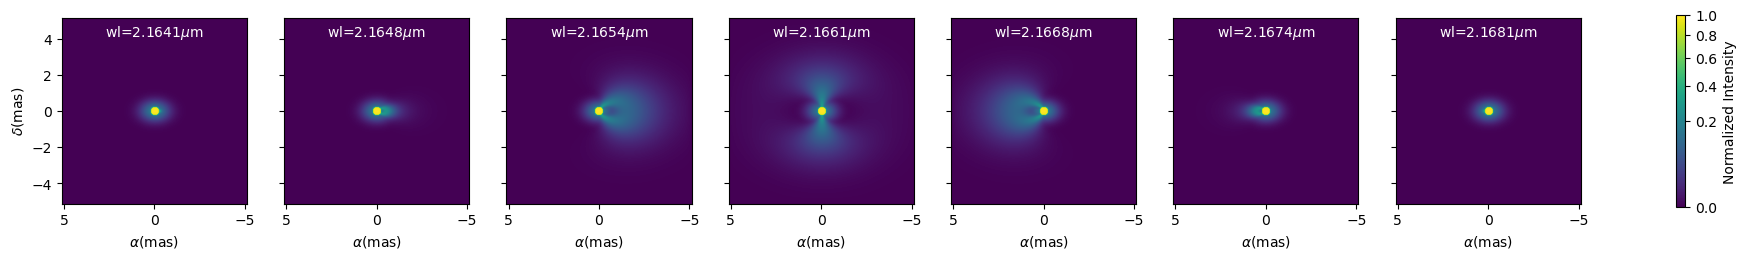

In [4]:
wlrange = 4e-9
wls = np.linspace(wl0-wlrange/2, wl0+wlrange/2, num=7)
fig, ax, im = mrot.showModel(512,0.02,wl=wls,legend=True,normalize=True)

#### **Question: Can you identify the three components of the oimKinematicDisk in this image?**

**oimodeler** offers a direct way to compute interferometric observable without the use of data by using the **getComplexCoherentFlux** method of the **oimModel** class.

This method requires the spatial coordinates **u/$\lambda$** and **v/$\lambda$** and optionally the wavelength **$\lambda$** (for chromatic model) and/or the time **t** (for time-dependent model).

### Let's compute some visiblity and phase through the line for two set of 150m baselines

1.   with a East-West orientation u=B/$\lambda$ and v=0
2.   with a North-South orientation u=0 and v=B/$\lambda$

In [5]:
B = 150
wl = np.linspace(wl0-2*wlrange, wl0+2*wlrange, num=101)

spf = B/wl

vcompl1 = mrot.getComplexCoherentFlux(spf,spf*0,wl=wl) #East-West
vcompl2 = mrot.getComplexCoherentFlux(spf*0,spf,wl=wl) #North-South

#### Extracting the differential visiblity and phase

from the complex coherent flux returned by the **getComplexCoherentFlux** method we can compute:
- the differential visibility: modulus of **vcompl** normalized by a reference channel, here the first channel (outside the emission line)
- the differential phase: phase of **vcompl** minus phase of the reference channel (which is 0 in our simple case)



In [6]:
vis1=np.abs(vcompl1)/np.abs(vcompl1[0])
phi1=np.rad2deg(np.angle(vcompl1))

vis2=np.abs(vcompl2)/np.abs(vcompl2[0])
phi2=np.rad2deg(np.angle(vcompl2))

### Plotting the visibility and phase throught the line for our 2 baselines

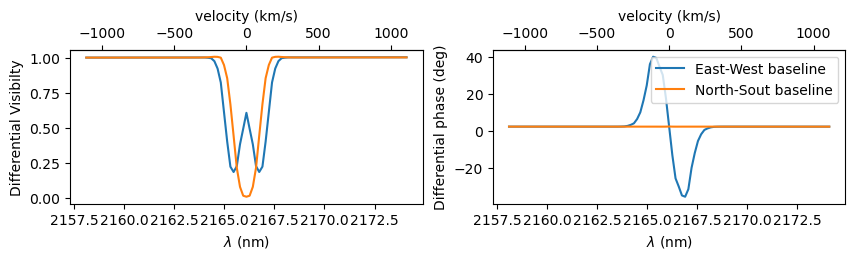

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2))
ax[0].plot(wl*1e9,vis1)
ax[0].plot(wl*1e9,vis2)
ax[1].plot(wl*1e9,phi1,label = "East-West baseline")
ax[1].plot(wl*1e9,phi2,label = "North-Sout baseline")
ax[0].set_xlabel("$\lambda$ (nm)")
ax[1].set_xlabel("$\lambda$ (nm)")
ax[0].set_ylabel("Differential Visibilty")
ax[1].set_ylabel("Differential phase (deg)")
ax[1].legend()

#this code creates a top axis where wavelength is converted into in velocities using the Doppler Effect
for i in range(2):
    secax = ax[i].secondary_xaxis('top', functions=(lambda x: (x/1e9-wl0)/wl0*3e5, lambda x: (x*wl0/3e8+wl0)*1e6))
    secax.set_xlabel('velocity (km/s)')

#### **Question: Can you explain the difference in phase profile for the two baselines?**

Help: Look at the narrow band images of our model and remember what a baseline is probing depending on it orientation

#### **Question: What about the visibilty?**

#### **Question: What happens if you decrease the size of the line emission (fwhmLine)? Why?**

## Now let's have a look at our object of interest: HD58647

HD 58647 is a brigh Herbig star (B9IV) that was observed with GRAVITY ([Bouarour et al. 2024](https://ui.adsabs.harvard.edu/abs/2024A%26A...682A.165G/abstract))  in HIGH spectral resolution using three different ATs configurations.

Here we will load three files (from the school archive):
- **GRAVI.2020-01-27.fits**
- **GRAVI.2020-01-28.fits**
- **GRAVI.2020-02-04.fits**

### We first load the data into an **oimData** object

In [16]:
dir0=Path(".").resolve().parents[1] / "data" / "RealData" / "GRAVITY" / "HD58647"

filenames=list(dir0.glob("*.fits"))
data=oim.oimData(filenames)

filenames

[WindowsPath('C:/Travail/GitHub/oimodeler/data/RealData/GRAVITY/HD58647/GRAVI.2020-01-27.fits'),
 WindowsPath('C:/Travail/GitHub/oimodeler/data/RealData/GRAVITY/HD58647/GRAVI.2020-01-28.fits'),
 WindowsPath('C:/Travail/GitHub/oimodeler/data/RealData/GRAVITY/HD58647/GRAVI.2020-02-04.fits')]

### Plotting the uv-plan coverage

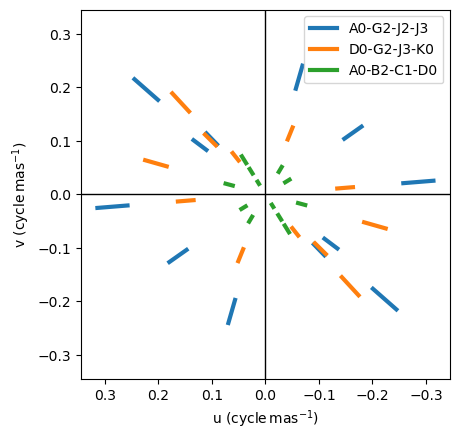

In [13]:
fig = plt.figure()
ax = plt.subplot(projection='oimAxes')
ax.uvplot(data,unit="cycle/mas",lw=3,color="byConfiguration")

### Plotting the visibility and closure phase as the function of the spatial frequency

With funny options showing both the wavlength dependence as a colorscale and the ATs configuration as a contour.

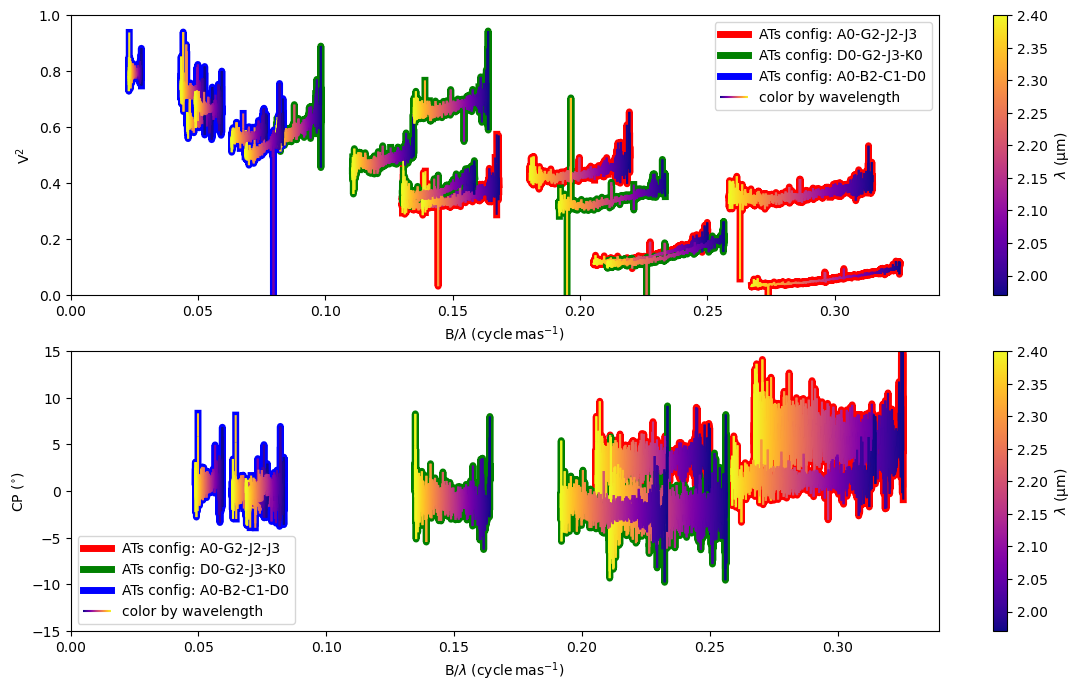

In [14]:
fig, ax = plt.subplots(2, 1, subplot_kw=dict(projection='oimAxes'), figsize=(14, 8))
ax[0].oiplot(data, "SPAFREQ", "VIS2DATA", xunit="cycle/mas",color="byConfiguration",lw=5,label="ATs config:",colorTab=["r","g","b"])
ax[0].oiplot(data, "SPAFREQ", "VIS2DATA", xunit="cycle/mas",cname="EFF_WAVE",cunit="micron",label="color by wavelength")

ax[1].oiplot(data, "SPAFREQ", "T3PHI", xunit="cycle/mas",color="byConfiguration",lw=5,label="ATs config:",colorTab=["r","g","b"])
ax[1].oiplot(data, "SPAFREQ", "T3PHI", xunit="cycle/mas", cname="EFF_WAVE",cunit="micron", label="color by wavelength")

ax[0].set_ylim(0,1)
ax[1].set_ylim(-15,15)
for i in range(2):
    ax[i].legend()
    ax[i].set_xlim(left=0)

#### **Question: Is the object chromatic through the K band?**

#### **Question: Is the object signficantly flatened? Is it strongly asymmetric?**

#### **Question: What is its caracteristic size?**

Although the plots as the function of the spatial frequency are very useful to understand the object geometry in the K-band continuum, they don't allow to vizualise correctly effects in the emission line. 

However, before going further on the line emission, we can constrain the geometry in the continuum

### Building a simple model for the continuum

In [15]:
pt  = oim.oimPt()
bkg = oim.oimBackground()
eg  = oim.oimEGauss(fwhm=oim.oimInterp("wl", wl=[2e-6,2.5e-6],values=[0,0]))

model_cont  = oim.oimModel(pt,eg,bkg)

pt.params["f"]=oim.oimParamNorm([eg.params["f"],bkg.params["f"]])

eg.params["f"].set(min=0,max=0.8)

bkg.params["f"].set(min=0,max=0.2)
eg.params["f"].set(min=0,max=1)
eg.params["pa"].set(min=-90,max=90)
eg.params["elong"].set(min=1,max=3)

#here we have to set independently the range in fwhm for both keyframes (2 and 2.5 micron)
eg.params["fwhm"].keyvalues[0].set(min=0,max=30) 
eg.params["fwhm"].keyvalues[1].set(min=0,max=30)    

model_cont.getFreeParameters()


{'c2_EG_f': oimParam at 0x21873d4e250 : f=1 ± 0  range=[0,1] free=True ,
 'c2_EG_elong': oimParam at 0x2187361cd50 : elong=1 ± 0  range=[1,3] free=True ,
 'c2_EG_pa': oimParam at 0x21873d4d1d0 : pa=0 ± 0 deg range=[-90,90] free=True ,
 'c2_EG_fwhm_interp1': oimParam at 0x21870d00510 : fwhm=0 ± 0 mas range=[0,30] free=True ,
 'c2_EG_fwhm_interp2': oimParam at 0x21874037950 : fwhm=0 ± 0 mas range=[0,30] free=True ,
 'c3_Bckg_f': oimParam at 0x2187361e910 : f=1 ± 0  range=[0,0.2] free=True }

### **Question: Explain this model (nature of each component and the choice made)**

### Wavelength-binning of the dataset to reduce computing time

In order to gain computing-time for our model fitting, we decide to bin our HIGH resolution GRAVITY data by a factor 100. 

We  therefore reduce the number of wavelength from 1628 to 16 wihch is no problem when modelling the continuum emission.

In [16]:
filt=oim.oimWavelengthBinningFilter(bin=100,normalizeError=False)
data.setFilter(filt)

C:\Users\ame\AppData\Roaming\Python\Python311\site-packages\astropy\io\fits\fitsrec.py:695: UserWarning: Field 23 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
C:\Users\ame\AppData\Roaming\Python\Python311\site-packages\astropy\io\fits\fitsrec.py:695: UserWarning: Field 24 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
C:\Users\ame\AppData\Roaming\Python\Python311\site-packages\astropy\io\fits\fitsrec.py:695: UserWarning: Field 25 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
C:\Users\ame\AppData\Roaming\Python\Python311\site-packages\astropy\io\fits\fitsrec.py:695: UserWarning: Field 26 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(
C:\Users\ame\AppData\Roaming\Python\Python311\site-packages\astropy\io\fits\fitsrec.py:695: UserWarning: Field 27 has a repeat count of 0 in its format code, indicating an empty field.
  warni

### We can check our dataset calling the **dataInfo** parameter of our **oimData** object

In [17]:
data.dataInfo

[[{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 16), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 16), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 16), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 16), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 16), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 16), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 16), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 16), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 16), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 16), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 16), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 16), 'data': ['FLUXDATA']}]]

### mcmc-fitting of the continuum with our three-components chromatic model

In [18]:
fit_cont=oim.oimFitterEmcee(data, model_cont,nwalkers=12,dataTypes=["VIS2DATA"])
fit_cont.prepare()
fit_cont.run(nsteps=2000,progress=True)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:32<00:00, 60.61it/s]


{'nsteps': 2000, 'progress': True}

c2_EG_f = 0.71795 ± 0.02071 
c2_EG_elong = 2.48746 ± 0.05309 
c2_EG_pa = 15.08601 ± 0.84286 deg
c2_EG_fwhm_interp1 = 2.35952 ± 0.07160 mas
c2_EG_fwhm_interp2 = 3.59195 ± 0.08417 mas
c3_Bckg_f = 0.15088 ± 0.00200 
chi2r = 1.09362


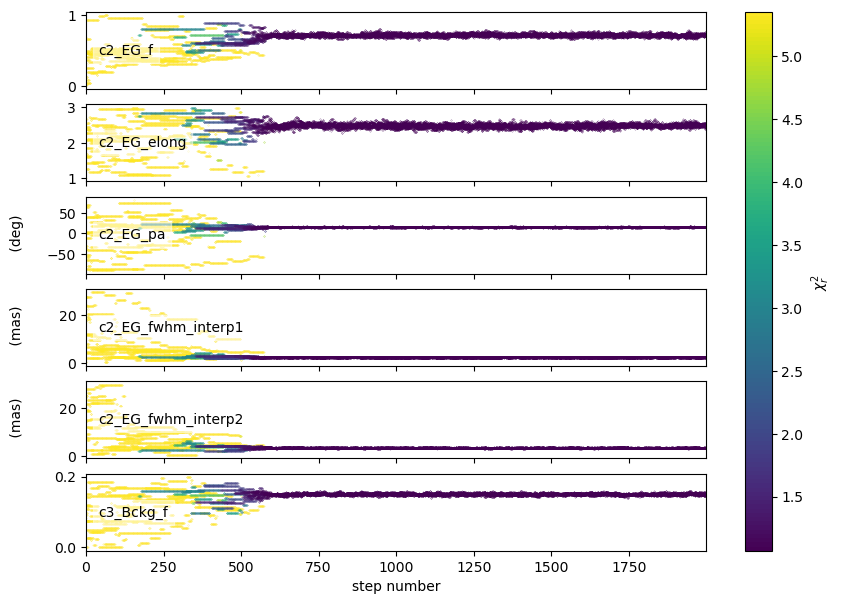

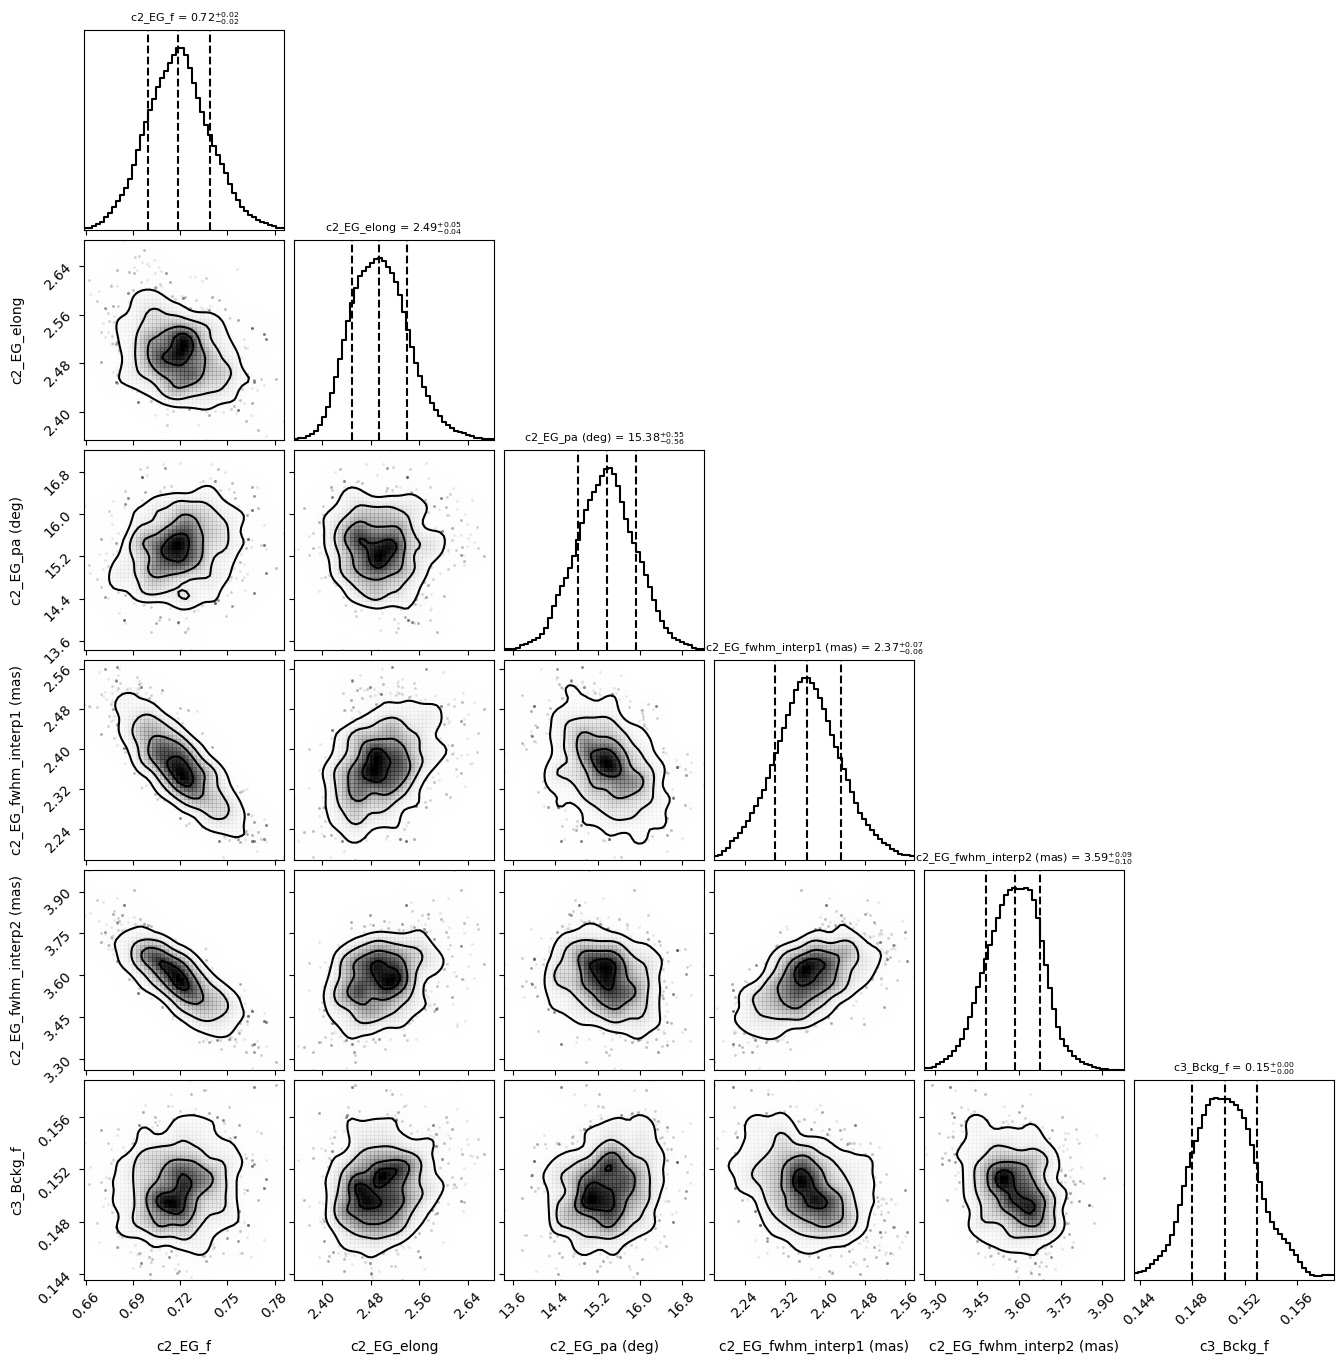

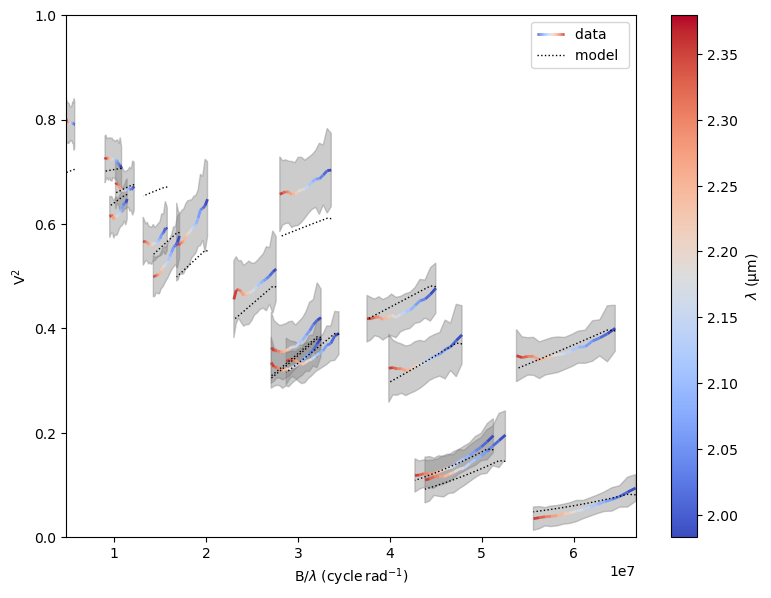

In [19]:
fit_cont.printResults(discard=1750,chi2limfact=5)
figWalker,axWalker = fit_cont.walkersPlot(chi2limfact=5)
figCorner,axCorner = fit_cont.cornerPlot(discard=1750,chi2limfact=5)
figSim,axSim = fit_cont.simulator.plot("VIS2DATA")

## HD58647 model in the Br$\gamma$ emission line

Now that we have a better understanding of the object geometry in the continuum we can proceed to modelling of the Br$\gamma$ line emission

### We should remove our binning filter first!

In [20]:
data.setFilter()
data.dataInfo

[[{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 1628), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 1628), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 1628), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 1628), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 1628), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 1628), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 1628), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 1628), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 1628), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 1628), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 1628), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 1628), 'data': ['FLUXDATA']}]]

### Cuting the data to keep only a small range ($\pm$4nm) in wavelength centered on Br$\gamma$

As we only want to model the B$\gamma$ emission we can cut our dataset to a small range around the emission.

Again we can use a filter to do so.

In [21]:
dwl=3e-9

filt = oim.oimWavelengthRangeFilter(wlRange=[wl0-dwl,wl0+dwl])
data.setFilter(filt)

data.dataInfo

[[{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 23), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 23), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 23), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 23), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 23), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 23), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 23), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 23), 'data': ['FLUXDATA']}],
 [{'arr': 'OI_VIS', 'idx': 4, 'nB': (6, 23), 'data': ['VISAMP', 'VISPHI']},
  {'arr': 'OI_VIS2', 'idx': 5, 'nB': (6, 23), 'data': ['VIS2DATA']},
  {'arr': 'OI_T3', 'idx': 6, 'nB': (4, 23), 'data': ['T3AMP', 'T3PHI']},
  {'arr': 'OI_FLUX', 'idx': 7, 'nB': (4, 23), 'data': ['FLUXDATA']}]]

### Wavelength-template plots to separate baselines

When studying the variation of the visibility and phase through a narrow spectral feature such as an emission line it is better to separate all baselines.

**oimodeler** comes with this functionality using the **oimWlTemplatePlots** class which allow to create complex wavelength-plots as shown in the example below.

Here we use this to plot :
- the unfiltered data in grey 
- the filtered data in red
- the uncertainties on the filtered data in red 



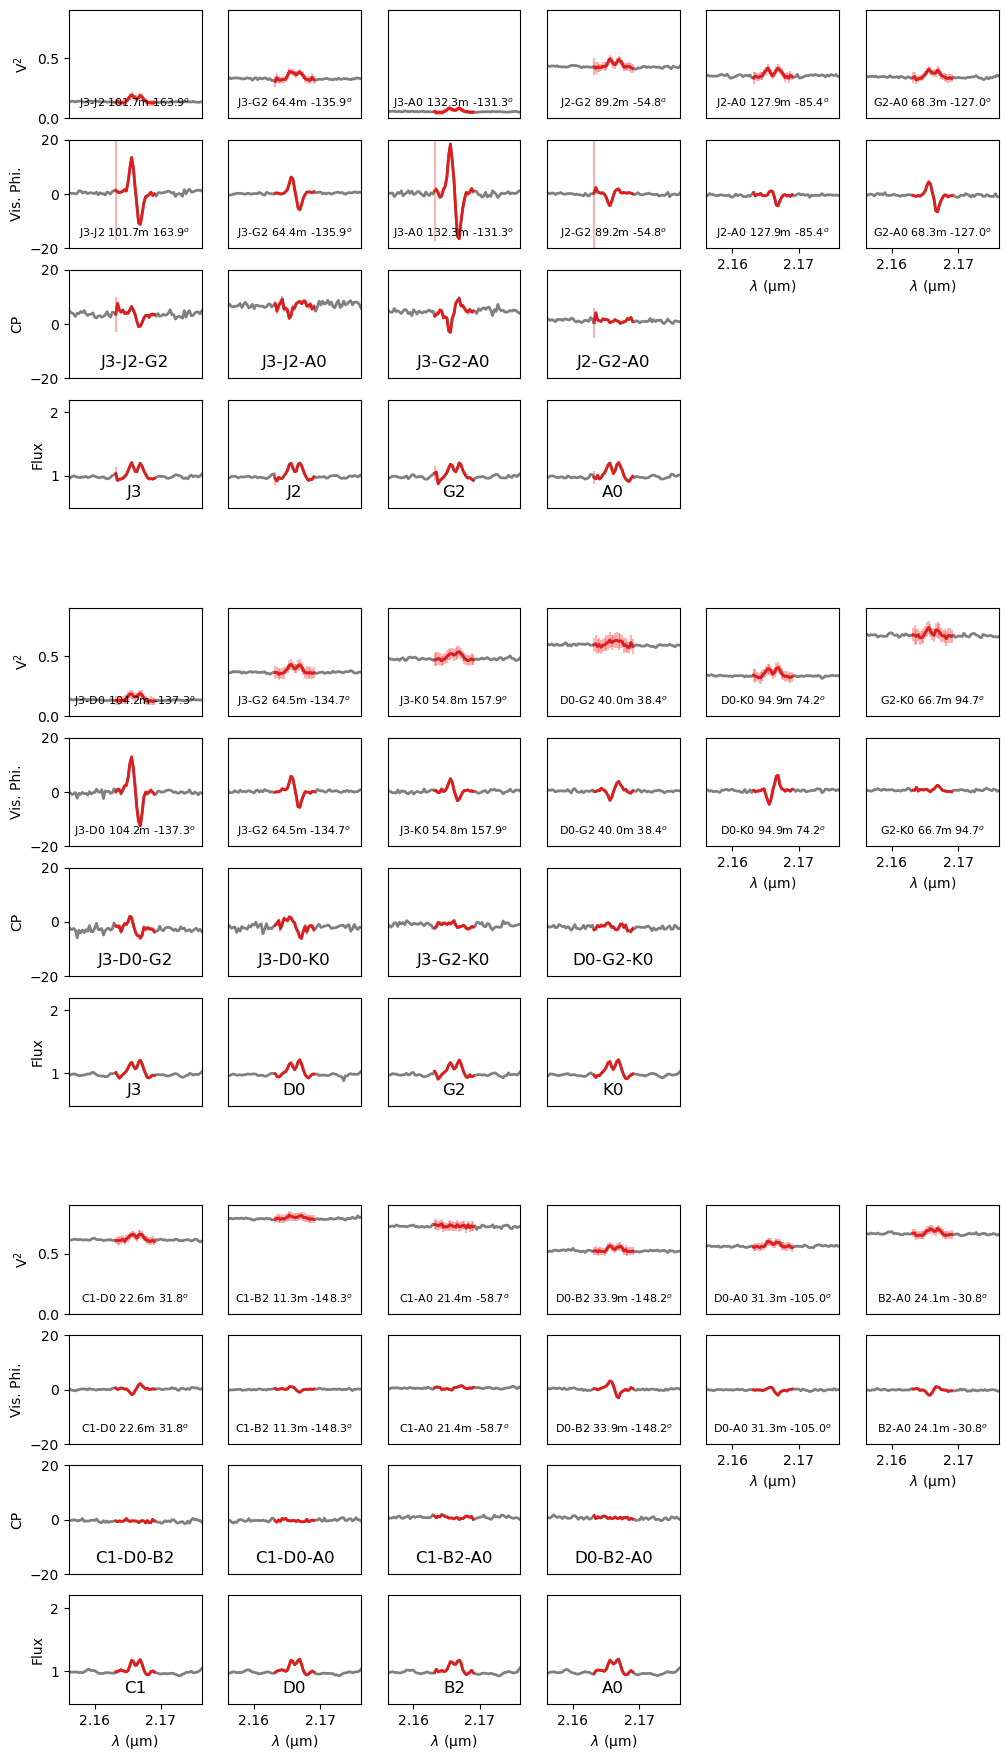

In [22]:
#Creating the figure
fig=plt.figure(FigureClass=oim.oimWlTemplatePlots, figsize=(12, 22))

#Plotting VIS2DATA, VISPHI, T3PHI and FLUXDATA on three different lines
fig.autoShape(data.data, shape=[["VIS2DATA"],["VISPHI"],["T3PHI"],["FLUXDATA"]])

#Setting the x unit to micron
fig.set_xunit("micron")

#Removing the filter to plot unfiltered data and putting it back afterward
data.setFilter()
fig.plot(data, plotFunctionkwarg=dict(color="grey",lw=2)) #unfiltered data
data.setFilter(filt)

#Plotting filtered data and errorbars
fig.plot(data, plotFunction=plt.Axes.errorbar,plotFunctionkwarg=dict(color="red", alpha=0.3))  #filtered data uncertainties
fig.plot(data, plotFunctionkwarg=dict(color="tab:red",lw=2)) #filtered data

#Setting limits and legends
fig.set_ylim(["VISPHI","T3PHI"],-20,20)
fig.set_ylim(["VIS2DATA"],0,0.9)
wlrange=20e-9
fig.set_xlim((wl0-wlrange/2)*1e6,(wl0+wlrange/2)*1e6)
fig.set_legends(0.5,0.1, "$BASELINE$ $LENGTH$m $PA$$^o$", ["VIS2DATA","VISPHI"],fontsize=8, ha="center")
fig.set_legends(0.5,0.1, "$BASELINE$", ["T3PHI"], fontsize=12, ha="center")
fig.set_legends(0.5,0.1, "$BASELINE$", ["FLUXDATA"], fontsize=12, ha="center")

#### **Question: Is the visibility variation similar to the one produced in the oimKinematicDisk example? Explain the cause**

### Building a background + kinematics disk model

Note that we use the distance (300pc) and R$_\star$ (4.7R$_\odot$) from the [GRAVITY paper](https://ui.adsabs.harvard.edu/abs/2024A%26A...682A.165G/abstract)

In [23]:
oim.oimOptions.ft.padding = 1 # padding option for the FFT 

dim, nwl, wl0, dwl, res = 64, 51, 2.1661e-6, 2.5e-10, 5e-10

bkg = oim.oimBackground(f=0.15)


rot = oim.oimKinematicDisk(f=0.85,dim=dim, fov=40, incl=66, Rstar=4.7, dist=300, fwhmCont=14.5,
                         fluxDiskCont=0.83, EW=5, fwhmLine=9, nwl=nwl,
                         vrot=400, beta=-0.5, pa=15+90, wl0=wl0, dwl=dwl,
                         res=res)

rot.normalizeImage = False
mrot = oim.oimModel(rot,bkg)

#### **Question: Why do we need to include a background but not a point source for the star and a elliptical Gaussian for the disk continuum?**

#### **Question: Which parameters are already constrained by our continuum fit?**

### Setting the parameter space

In [24]:
"""
bkg.params["f"].set(free=False,value=0.15)
rot.params["f"]=oim.oimParamNorm([bkg.params["f"]])
rot.params["Rstar"].free=False
rot.params["dist"].free=False
rot.params["beta"].free=False #the disk is considered to be in Keplerian rotation beta=-0.5
rot.params["fluxDiskCont"].free=False
rot.params["incl"].free=False
rot.params["pa"].free=False

rot.params["fwhmCont"].set(min=1,max=30)
rot.params["fwhmLine"].set(min=1,max=30)
rot.params["EW"].set(min=2,max=20)
rot.params["vrot"].set(min=200,max=500)

"""

rot.params["f"]=oim.oimParamNorm([bkg.params["f"]])
bkg.params["f"].set(free=False,value=0.15)

rot.params["Rstar"].free=False
rot.params["dist"].free=False
rot.params["beta"].free=False

rot.params["fluxDiskCont"].set(min=0,max=1)
rot.params["fwhmCont"].set(min=1,max=30)
rot.params["fwhmLine"].set(min=1,max=30)
rot.params["incl"].set(min=5,max=85)
rot.params["EW"].set(min=2,max=20)
rot.params["vrot"].set(min=200,max=500)

mrot.getFreeParameters()

{'c1_Gen_comp_pa': oimParam at 0x21809d6a1d0 : pa=105 ± 0 deg range=[-180,180] free=True ,
 'c1_Gen_comp_fwhmCont': oimParam at 0x21809d8bf50 : fwhmCont=14.5 ± 0  range=[1,30] free=True ,
 'c1_Gen_comp_fwhmLine': oimParam at 0x218086df790 : fwhmLine=9 ± 0  range=[1,30] free=True ,
 'c1_Gen_comp_fluxDiskCont': oimParam at 0x218086dc910 : fluxDiskCont=0.83 ± 0  range=[0,1] free=True ,
 'c1_Gen_comp_incl': oimParam at 0x21808876dd0 : incl=66 ± 0 deg range=[5,85] free=True ,
 'c1_Gen_comp_EW': oimParam at 0x21809d28310 : EW=5 ± 0 Angstrom range=[2,20] free=True ,
 'c1_Gen_comp_vrot': oimParam at 0x21809d20c90 : vrot=400 ± 0 km / s range=[200,500] free=True }

### Running the mcmc fitter

In [25]:
fit=oim.oimFitterEmcee(data, mrot,nwalkers=14,dataTypes=["VIS2DATA","VISPHI","FLUXDATA"])
fit.prepare()
fit.run(nsteps=2500,progress=True)

100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [06:12<00:00,  6.72it/s]


{'nsteps': 2500, 'progress': True}

### Printing results and making walkers & corner plots

c1_Gen_comp_pa = 107.31164 ± 0.24422 deg
c1_Gen_comp_fwhmCont = 16.80419 ± 0.09192 
c1_Gen_comp_fwhmLine = 9.74274 ± 0.10936 
c1_Gen_comp_fluxDiskCont = 0.99757 ± 0.00183 
c1_Gen_comp_incl = 80.34117 ± 0.12400 deg
c1_Gen_comp_EW = 4.12261 ± 0.01154 Angstrom
c1_Gen_comp_vrot = 419.04304 ± 2.32507 km / s
chi2r = 22.43136


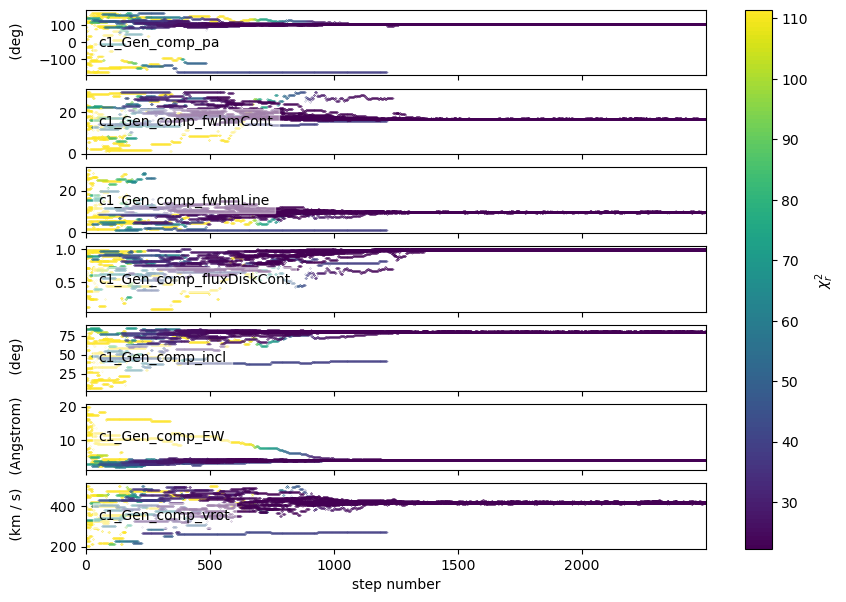

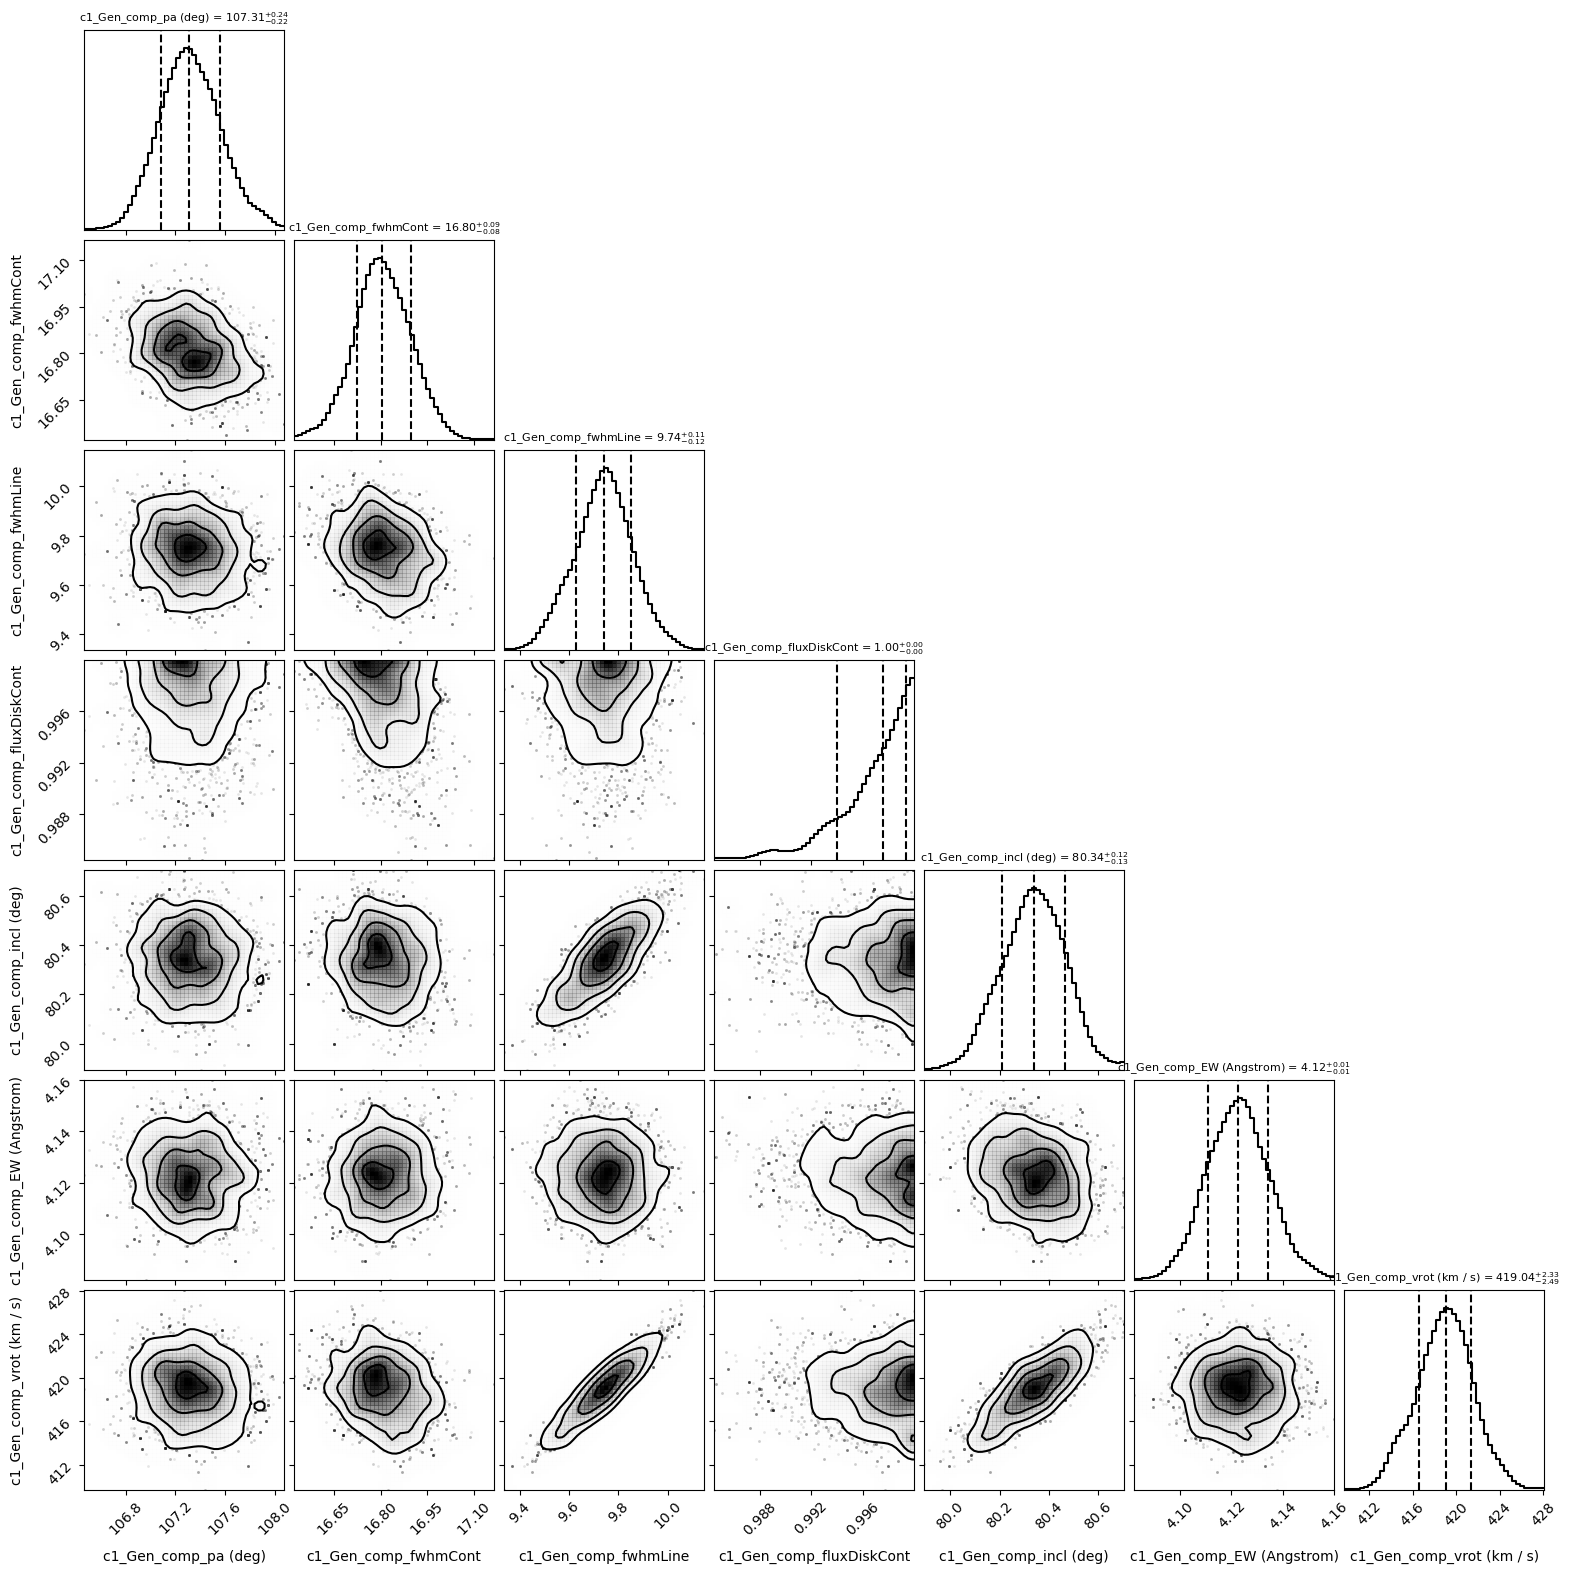

In [26]:
fit.printResults(mode='median', discard=2000,chi2limfact=3)

figWalker,axWalker = fit.walkersPlot(chi2limfact=5)
figCorner,axCorner = fit.cornerPlot(discard=2000,chi2limfact=3)

### Plotting the data/model comparison

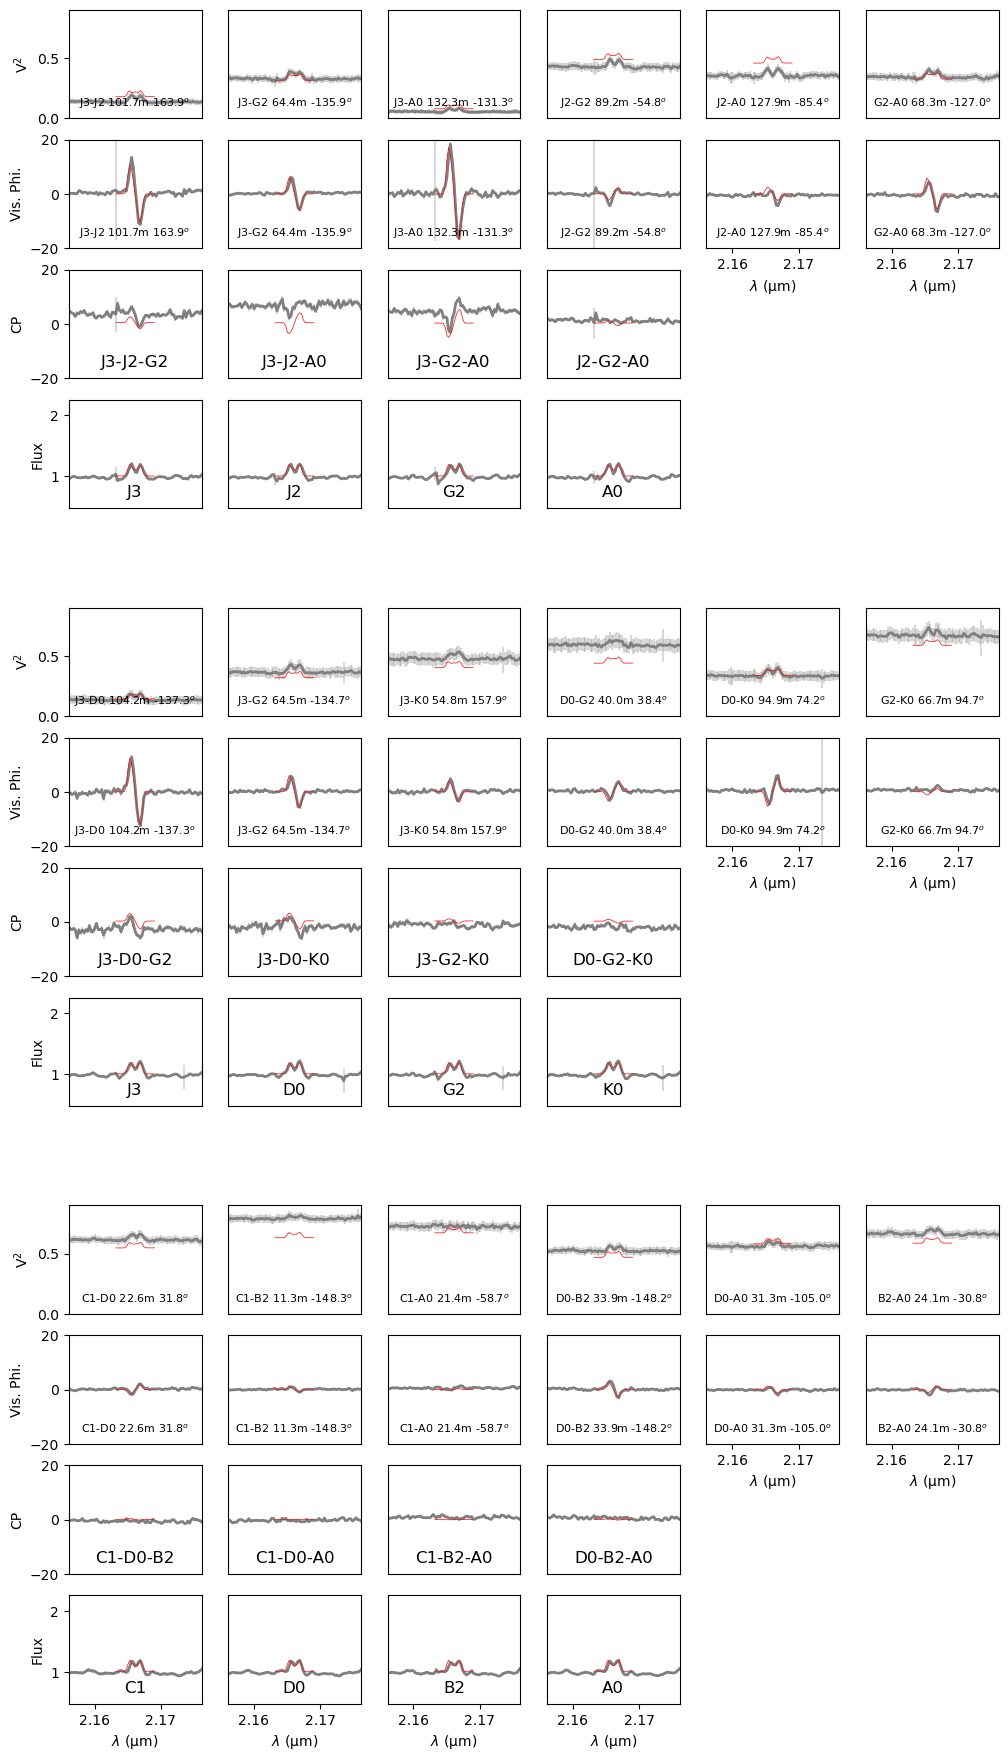

In [27]:
fig=plt.figure(FigureClass=oim.oimWlTemplatePlots, figsize=(12, 22))

#Plotting VIS2DATA, VISPHI, T3PHI and FLUXDATA on three different lines
fig.autoShape(data.data, shape=[["VIS2DATA"],["VISPHI"],["T3PHI"],["FLUXDATA"]])

fig.set_xunit("micron")

data.setFilter()
fig.plot(data, plotFunctionkwarg=dict(color="grey",lw=2)) #unfiltered data
fig.plot(data, plotFunction=plt.Axes.errorbar,plotFunctionkwarg=dict(color="grey", alpha=0.3))  #unfiltered data uncertainties

data.setFilter(filt)
fig.plot(fit.simulator.simulatedData, plotFunctionkwarg=dict(color="r",lw=0.5))

wlrange=20e-9
fig.set_ylim(["VISPHI","T3PHI"],-20,20)
fig.set_ylim(["VIS2DATA"],0,0.9)
fig.set_xlim((wl0-wlrange/2)*1e6,(wl0+wlrange/2)*1e6)
fig.set_legends(0.5,0.1, "$BASELINE$ $LENGTH$m $PA$$^o$", ["VIS2DATA","VISPHI"],fontsize=8, ha="center")
fig.set_legends(0.5,0.1, "$BASELINE$", ["T3PHI"], fontsize=12, ha="center")
fig.set_legends(0.5,0.1, "$BASELINE$", ["FLUXDATA"], fontsize=12, ha="center")

### Plotting images through the Br$\gamma$ line

We remove the star emission (by setting fluxDiskCont=1) in order the enhjance the image dynamics.

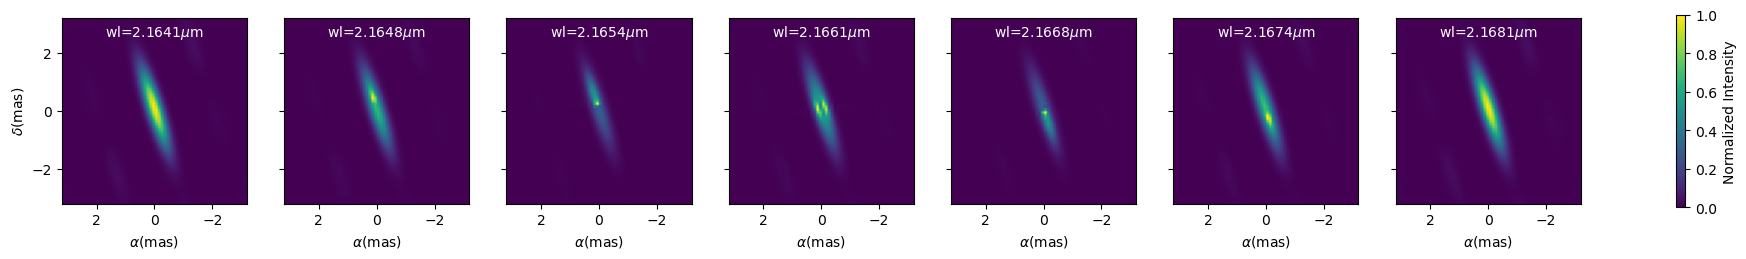

In [28]:
wlrange = 4e-9
wls = np.linspace(wl0-wlrange/2, wl0+wlrange/2, num=7)
val=rot.params['fluxDiskCont'].value
rot.params['fluxDiskCont'].value=1
fig, ax, im = mrot.showModel(64,0.1,wl=wls,legend=True,normalize=True,normPow=1,fromFT=True)
rot.params['fluxDiskCont'].value=val

#### **Question: Is the fit satisfaying? If not how would you improve your model?**

#### **Question: Compare your results with those of the GRAVITY paper by [Bouarour et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024A%26A...682A.165G/abstract) ?**